<a href="https://colab.research.google.com/github/vrmusketeers/FYP-2021/blob/master/notebooks/neural_net/CNN_Base_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Python Packages


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

# Data Pre-Processing


In [4]:
train = ImageDataGenerator(rescale=1/255,preprocessing_function=to_grayscale_then_rgb)
test = ImageDataGenerator(rescale=1/255,preprocessing_function=to_grayscale_then_rgb)
val = ImageDataGenerator(rescale=1/255,preprocessing_function=to_grayscale_then_rgb)

In [5]:
train_dataset = train.flow_from_directory("/content/drive/Shareddrives/Final Project/FmriTrainTestData/VG16-Data/Output/train",
                                          target_size = (224, 224),
                                          batch_size = 10)
                                     
test_dataset = test.flow_from_directory("/content/drive/Shareddrives/Final Project/FmriTrainTestData/VG16-Data/Output/test",
                                          target_size= (224, 224),
                                          batch_size = 10 )

validation_dataset = test.flow_from_directory("/content/drive/Shareddrives/Final Project/FmriTrainTestData/VG16-Data/Output/val",
                                          target_size= (224, 224),
                                          batch_size = 10 )


Found 6968 images belonging to 2 classes.
Found 871 images belonging to 2 classes.
Found 871 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'1': 0, '2': 1}

In [7]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# Model Building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'), 
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

# Compile and Train

In [12]:
## Compile the model
#from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

#opt = SGD(learning_rate=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,
            steps_per_epoch = 20,
            batch_size=16,
            epochs = 50,
            validation_data = validation_dataset)

Epoch 1/50
20/20 [==============================] - 387s 20s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 84s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 78s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 76s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 76s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 70s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 69s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/50
20/20 [

# Visualize Results

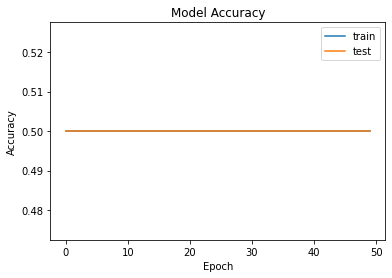

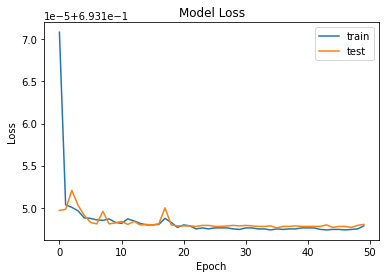

In [16]:
# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [18]:
probabilities = model.predict_generator(generator=test_dataset)
y_true = test_dataset.classes
y_pred = probabilities > 0.5
font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


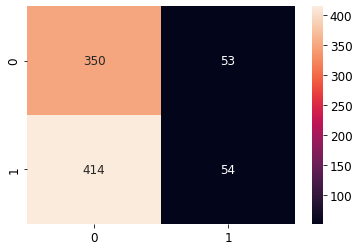

In [19]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, y_pred)
# plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), show_normed=False)

#plot_confusion_matrix(model, y_true, y_pred)
f = sns.heatmap(mat, annot=True, fmt='d')